<a href="https://colab.research.google.com/github/MoAlsayed/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
  - Author: Mohammed Alsayed


## Project Overview

## Load and Inspect Data

In [501]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [502]:
# Import required packages
import pandas as pd

# Save the filepath and load the data as "df_titanic"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [503]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [504]:
# Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1) How many rows and columns?

Answer: 8523 rows and 12 columns

2) What are the datatypes of each variable?


In [505]:
# understand the data type for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We have 7 object, 4 float, and 1 integer columns

3) Are there duplicates? If so, drop any duplicates.

In [506]:
# Save a filter called "duplicated_rows" that identifies duplicated rows, then count its number
duplicated_rows = df.duplicated()
df.duplicated().sum()

0

In [507]:
# identify missing values
# Get the number of null values for all columns and save as a variable
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [508]:
# Use this result to calculate the percentage of null values for each column.
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

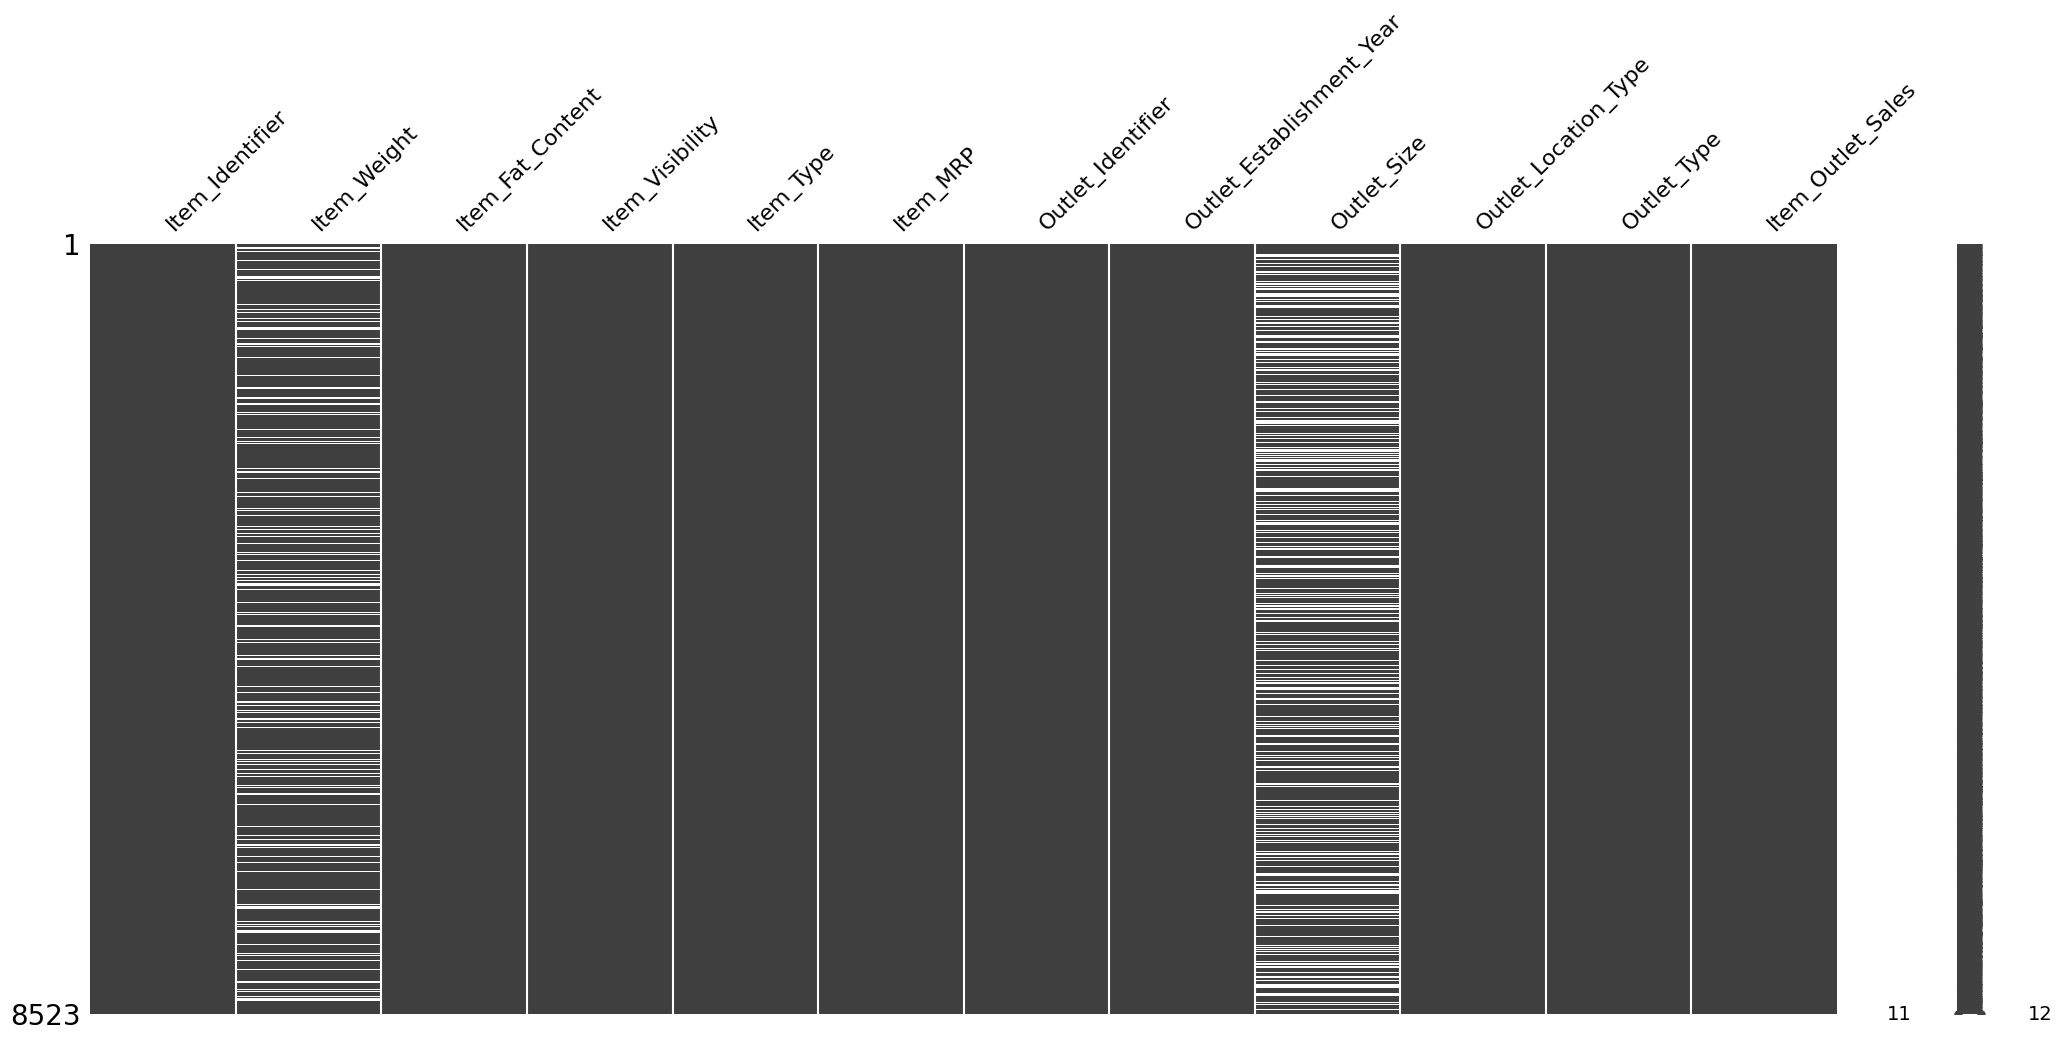

In [509]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

5) Address the missing values by using a placeholder value.

In [510]:
# fill object null values with MISSING
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
# fill numeric null values with MISSING
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [511]:
# check if all missing data is filled now
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

## check for data inconsistency.

In [512]:
# define a list of object data columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [513]:
# Check the nunique for just the object cols
string_cols = df[string_cols]
num_of_unique = string_cols.nunique()
(num_of_unique / len(string_cols)) *100
# Explore the value counts of one feature
string_cols.value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             MISSING      Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [514]:
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [515]:
# replace the inconsistant data
df['Item_Fat_Content'] = string_cols['Item_Fat_Content'].replace({'reg':"Regular",
                                                                           'Low Fat': 'low fat',
                                                                           'LF': 'low fat'})
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [516]:
# obtain a summary statistics
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992782                1997.831867   
std       6.720742         0.051598    62.275067                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


save the data

In [517]:
# Save the folder + filename as a variable called fpath
fpath_out = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/Clean_sales_prediction_2023.csv"
# Use to_csv to save the dataframe using the filename
df.to_csv(fpath_out, index=True)

In [518]:
# check if everything is right
# Read in your new .csv file with Pandas.
loaded = pd.read_csv(fpath_out)
# Display the info summary.
loaded.info()
# Display the first 5 rows.
loaded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Dana Analysis

In [519]:
# import important libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Visualizing analysis to undersand its variability

- starting with univariate analysis for the 'Item Fat Content', 'Item Type', and 'Outlet Type' features.  

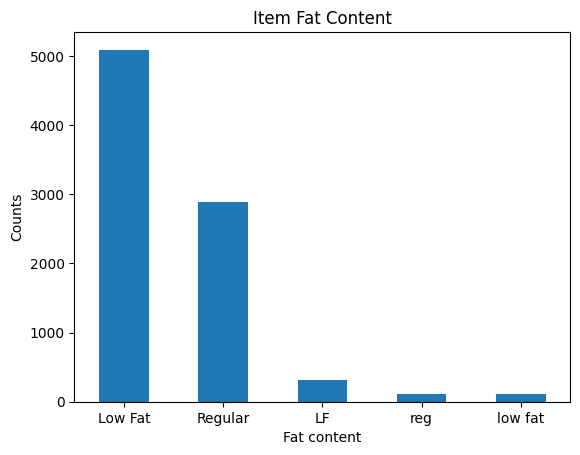

In [520]:
# count plot for the "Item_Fat_Content"
ax = string_cols['Item_Fat_Content'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 0)
plt.title("Item Fat Content")
plt.xlabel('Fat content')
plt.ylabel('Counts');

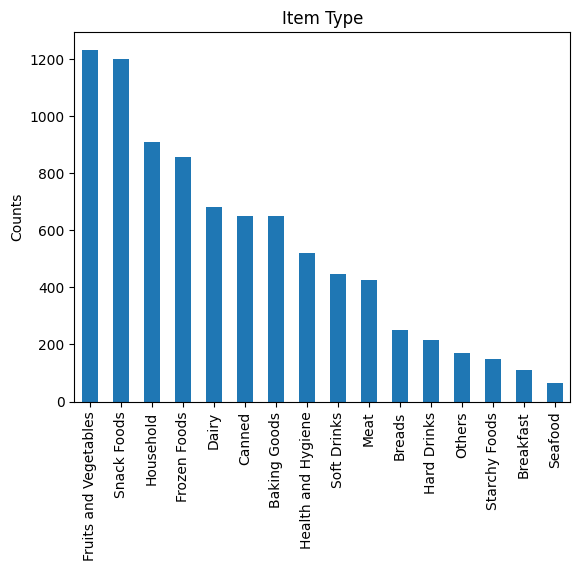

In [521]:
# count plot for the "Item_Type"
ax = string_cols['Item_Type'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 90)
plt.title("Item Type")
plt.ylabel('Counts');

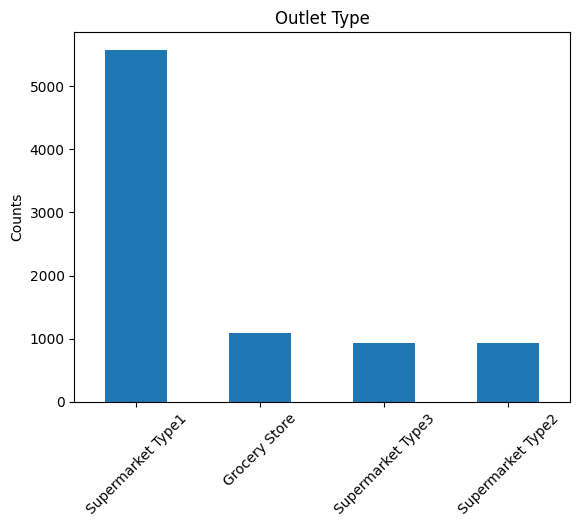

In [522]:
# count plot for the "Item_Fat_CoOutlet_Type"
ax = string_cols['Outlet_Type'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation = 45)
plt.title("Outlet Type")
plt.ylabel('Counts');

### Conclusions:
- Univariate counts analysis showed that Low fat content is constitute almost double the number of regular fat components.
- when it comes to items type, the highest frequency are fruits and vegetables, snack foods, household, and frozen foods.
- the outlet type analysis showed that Supermarket Type1 constitute more than 50% of the sales.

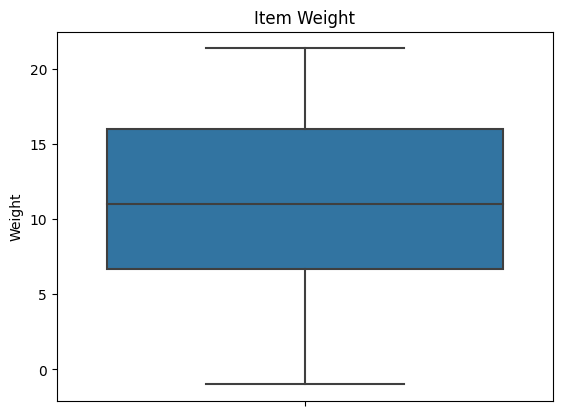

In [523]:
# Create a boxplot for the Item Weight
ax = sns.boxplot(data=df, y="Item_Weight")
ax.set_ylabel("Weight")
ax.set_title("Item Weight");

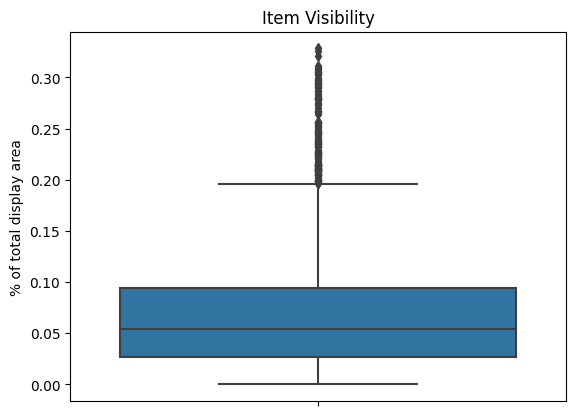

In [524]:
# Create a boxplot for the Item Visibility that is the percentage of total display area of all products in a store allocated to the particular product
ax = sns.boxplot(data=df, y="Item_Visibility")
ax.set_ylabel("% of total display area")
ax.set_title("Item Visibility");

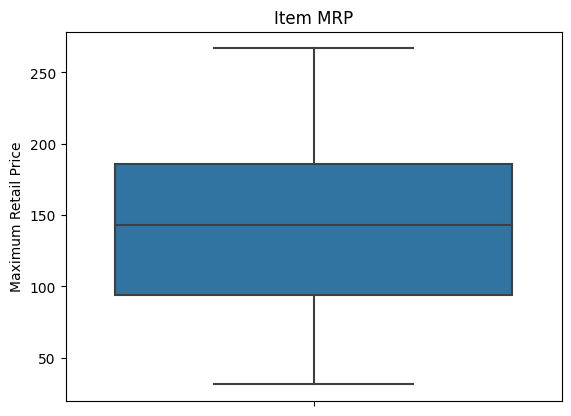

In [525]:
# Create a boxplot for the Item MARP that is the maximum retail price (list price) of the product
ax = sns.boxplot(data=df, y="Item_MRP")
ax.set_ylabel("Maximum Retail Price")
ax.set_title("Item MRP");

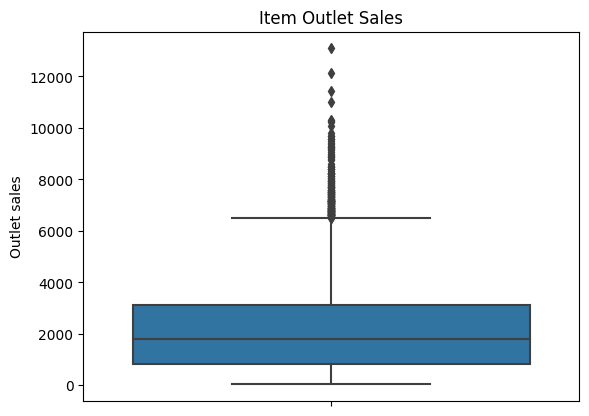

In [526]:
# Create a boxplot for the Item Outlet Sales, that is the sales of the product in a particular store.
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")
ax.set_ylabel("Outlet sales")
ax.set_title("Item Outlet Sales");

### Conclusions:
- The boxplots showed that Item visibility and Item outlet sales features contain many upper outlier values.
- It also showed that Item weight and Item MRP values are distributed almost equally around the median.

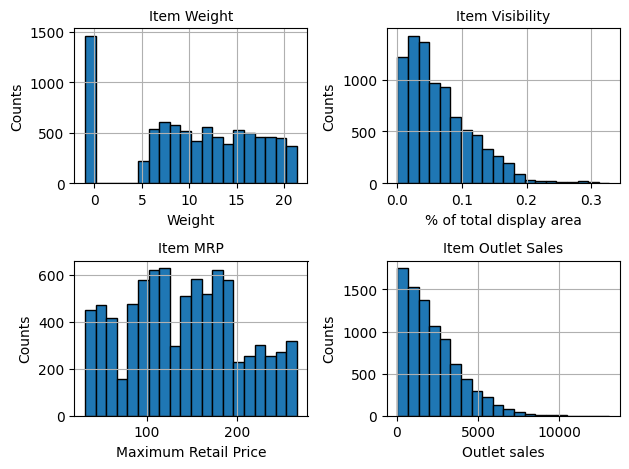

In [527]:
# Plot matrix of histograms to understand the variability of Item weight, Item visibility, Item MRP, and Item outlet sales.

# define the matrix size
fig, axes = plt.subplots(nrows=2, ncols=2)

# plot the Item weight
ax = df['Item_Weight'].hist(ax=axes[0,0], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Weight', size=10)
ax.set_xlabel('Weight', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the item visibility
ax = df['Item_Visibility'].hist(ax=axes[0,1], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Visibility', size=10)
ax.set_xlabel('% of total display area', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the item MRP
ax = df['Item_MRP'].hist(ax=axes[1,0], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item MRP', size=10)
ax.set_xlabel('Maximum Retail Price', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

# plot the Item outlet sales
ax = df['Item_Outlet_Sales'].hist(ax=axes[1,1], bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.set_title('Item Outlet Sales', size=10)
ax.set_xlabel('Outlet sales', size=10)
ax.set_ylabel('Counts', size=10);
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()

### Conclusions:
- from the above histograms, it is notable that for item outlet sales, most of the counts are in the data lower values.
- for the item visibility plot, most of the counts are located between 0.0 and 0.06.
- for the MRP, data variability does not give clear indicator.
- for item weight, large number of the counts are in the smallest weights cluster.

### Executing multivariate analysis for different features

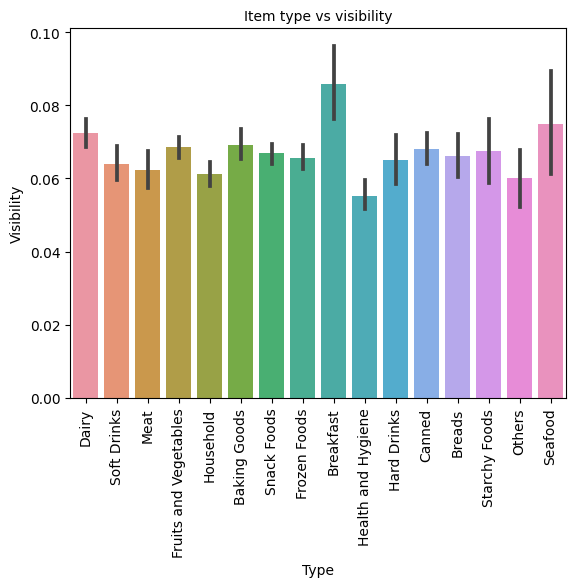

In [528]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_Visibility")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs visibility', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Visibility', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusions:
- there is no significant different when it comes to visibility vs type. However, breakfast item type benefit from the highest visibility values. This is normal since it is a quick turnover item. In contrast, health and hygiene item suffers from the lowes visibility indicator, which is also normal since the item expected turnover is relatively low.

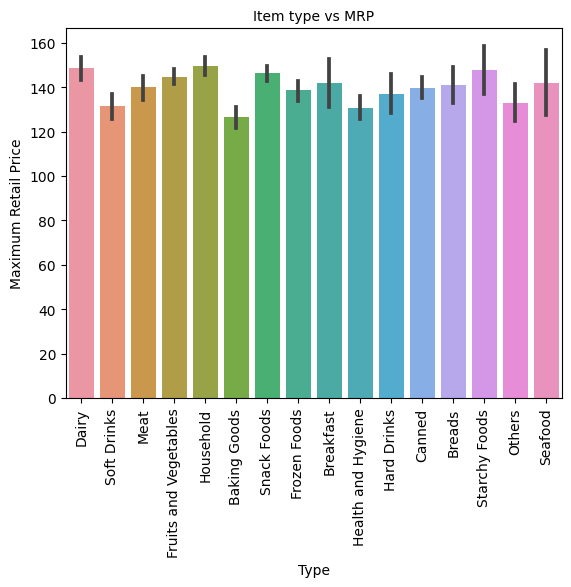

In [529]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_MRP")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs MRP', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Maximum Retail Price', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- no significant variability.

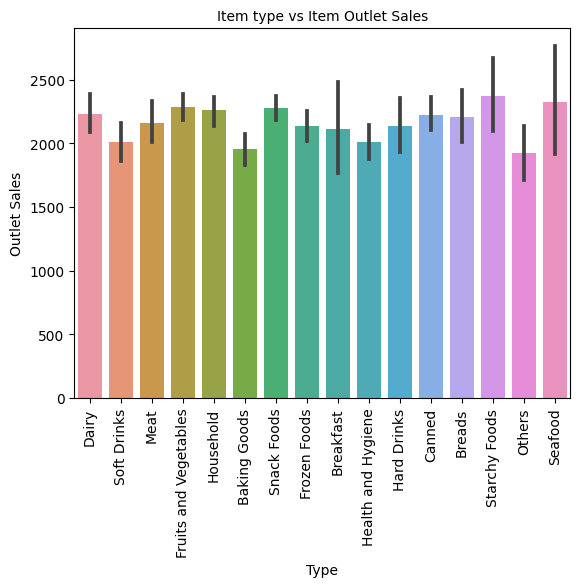

In [530]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Item_Type', y="Item_Outlet_Sales")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Item type vs Item Outlet Sales', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Outlet Sales', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- No signifcant variability.

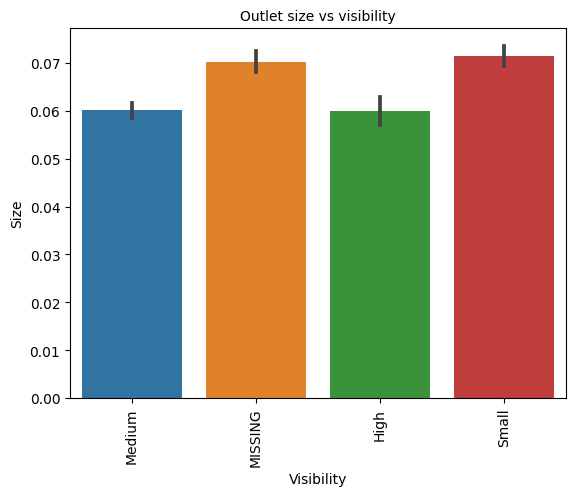

In [531]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Outlet_Size', y="Item_Visibility")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Outlet size vs visibility', size=10)
ax.set_xlabel('Visibility', size=10);
ax.set_ylabel('Size', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- The item visibility does not vary significantly with its size.

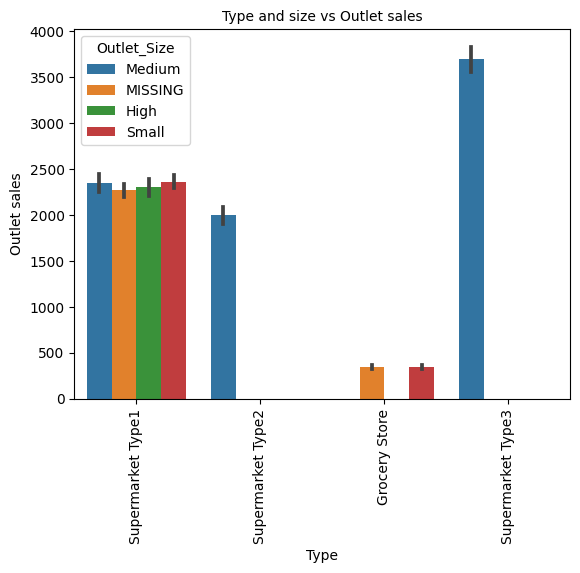

In [532]:
# Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Outlet_Type', y="Item_Outlet_Sales", hue="Outlet_Size")
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Type and size vs Outlet sales', size=10)
ax.set_xlabel('Type', size=10);
ax.set_ylabel('Outlet sales', size=10);
ax.tick_params(axis='both', labelsize=10);

### Conclusion:
- In all outlet types, the medium size outlets constitute the largest share when it comes to Outlet sales.

### Explore the correlations between numeric features.

In [533]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


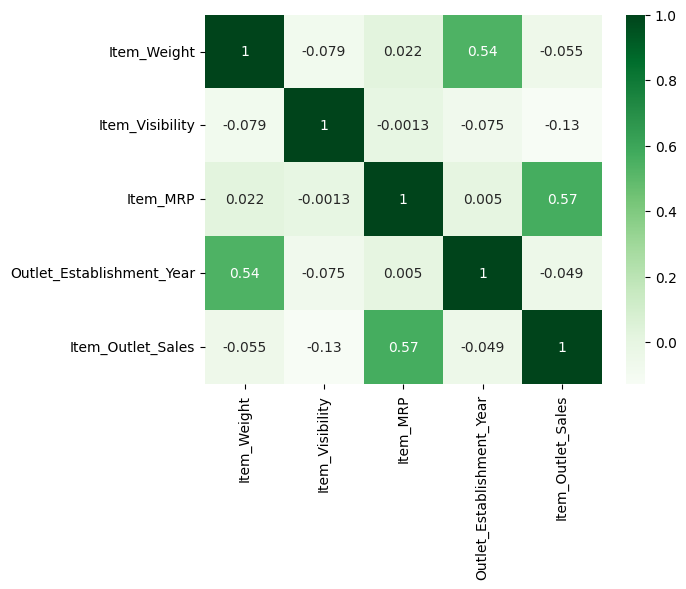

In [534]:
# Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

### Conclusions:
- most of the corelation values are weak.
- there is a good positive correlation between Item_MRP and Item_Outlet_Sales (correlation = 0.57), that means the higher the MRP, and more Outlet_Sales will be.
- there is a good positive correlation (0.54) between Item_Weights and Outlet_Establishment_Year.

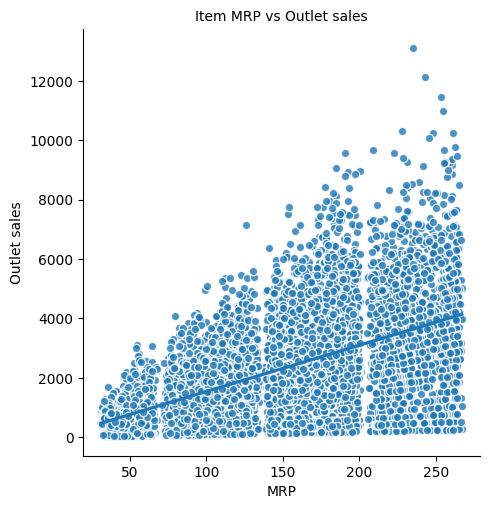

In [535]:
# Set the title using g.ax.set_title()
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",
               scatter_kws=scatter_kws);
g.ax.tick_params(axis='x', rotation = 0)
g.ax.set_title('Item MRP vs Outlet sales', size=10)
g.ax.set_xlabel('MRP', size=10);
g.ax.set_ylabel('Outlet sales', size=10);
g.ax.tick_params(axis='both', labelsize=10);

## Feature Inspection

## EDA Functions

### Univariate EDA Functions

In [536]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

### Multivariate Feature vs. Target Functions.

In [537]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Filter and inspect the catogorial data Features:

In [538]:
# Filter categorial columns
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Inspect the "Item_Fat_Content" feature:


### The "Item_Fat_Content" feature dictionary is:
- Whether the product is low-fat or regular


In [539]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

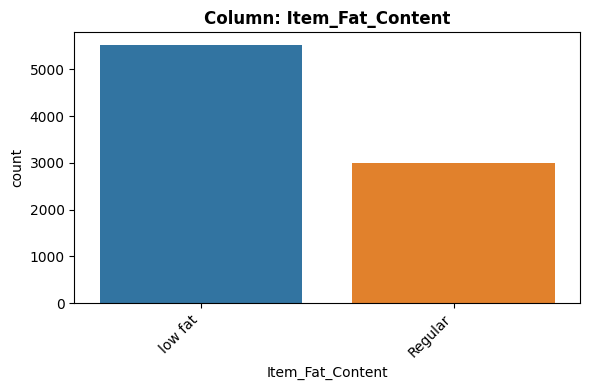

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [540]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

### The feature is:
- Categorial
- No Null values
- No quasi constant values
- No cardinality

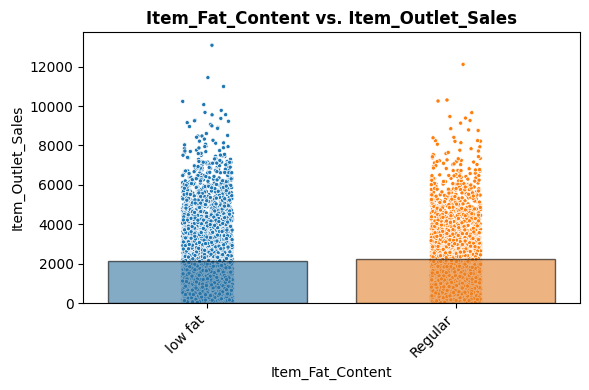

In [541]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### It seems that both Regular and low fat had the same mean and values variability vs the target, so it can be excluded.

## Inspect the "Item_Type" feature:


### The "Item_Type" feature dictionary is:
- The category to which the product belongs

In [542]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

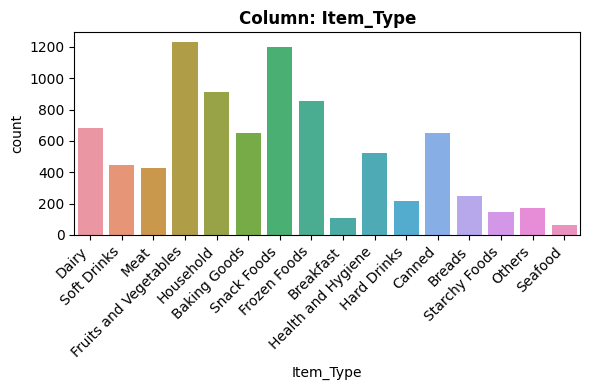

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [543]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

### The feature is with high cardinality (>10)

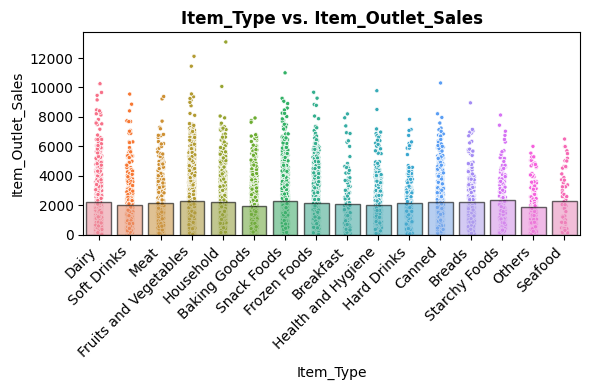

In [544]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### We can drop the feature from the model due to high cardinality and insignificant variability with the target.

## Inspect "Outlet_Identifier" feature:


### The "Outlet_Identifier" feature dictionary is:
- Store ID

In [545]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

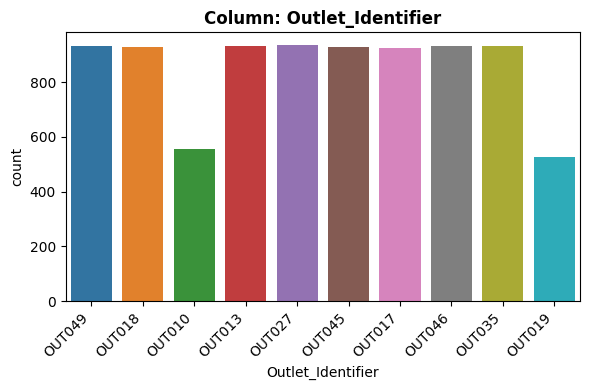

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [546]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

### it is on the threshold to be considered with high cardinality.

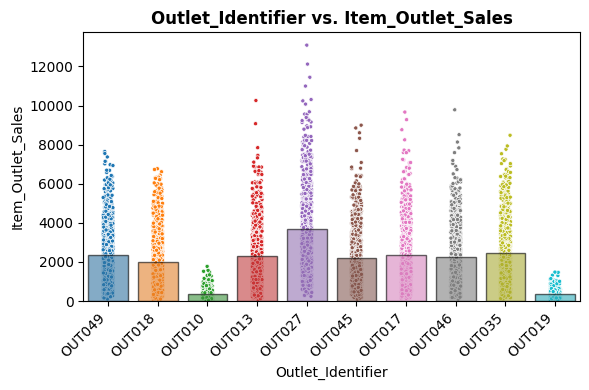

In [547]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### the feature can be used in the model since it shows mean and values variability with the target feature

## Inspect "Outlet_Size" feature:

### The "Outlet_Size" feature dictionary is:
- The size of the store in terms of ground area covered


In [548]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

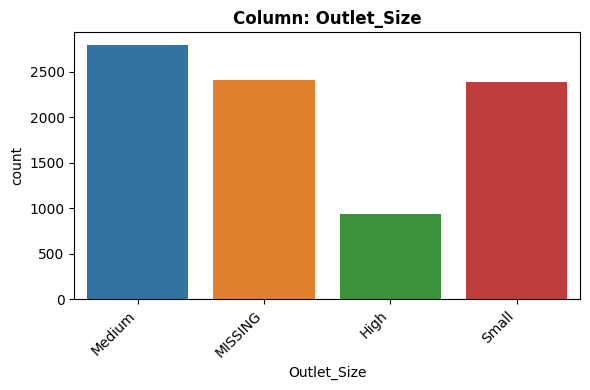

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [549]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

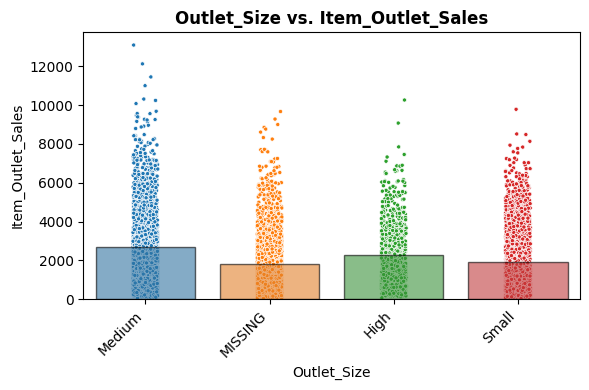

In [550]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### Due to high missing values number, that we can't replace by mean of to assume it belongs to specific category, and the low variability with the target feature, we can exclude it.

## Inspect "Outlet_Location_Type" feature:

### The "Outlet_Location_Type" feature dictionary is:
- The type of area in which the store is located

In [551]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

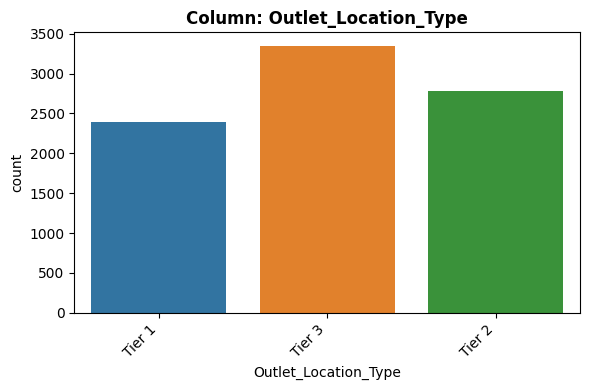

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [552]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

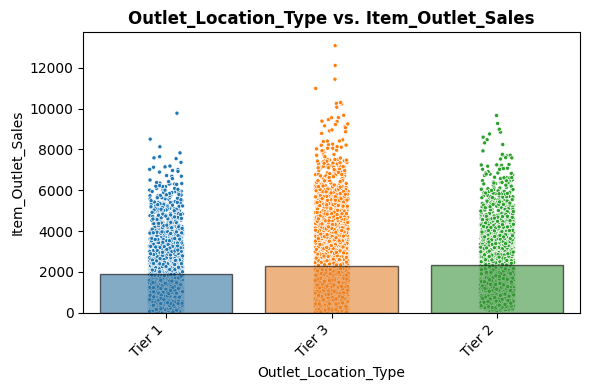

In [553]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### No significant variability with the target feature so we can exclude it.

## Inspect the "Outlet_Type" feature:

### The "Outlet_Type" feature dictionary is:
- Whether the outlet is a grocery store or some sort of supermarket

In [554]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

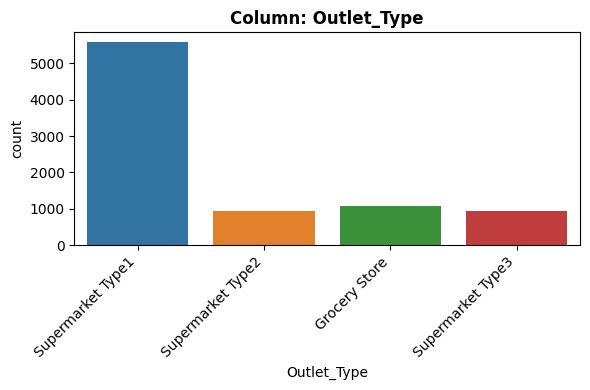

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [555]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None);

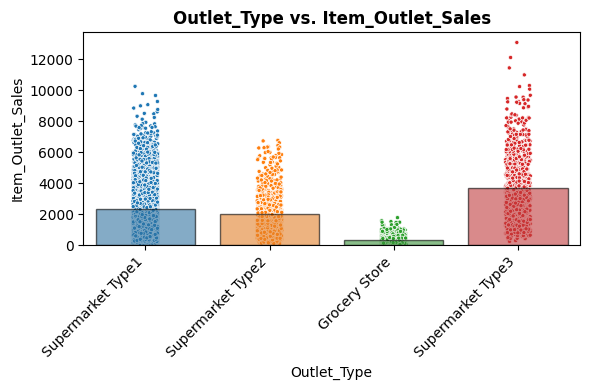

In [556]:
# Run the appropriate feature vs. target function (based on dtype)
x = feature
plot_categorical_vs_target(df, x, y="Item_Outlet_Sales" ,figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None);

### The feature show variability with the target, so it will be included.

## Define a filter for numeric data columns:

In [557]:
# determine categorial columns
numeric_cols = df.select_dtypes("number").columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Inspect the "Item_Weight" feature:

### The "Item_Weight" feature dictionary is:
- Weight of product


In [558]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

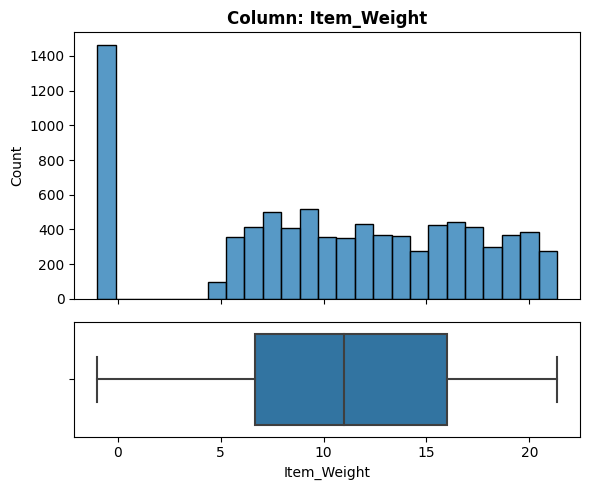

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '-1.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [559]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_numeric(df, x, figsize=(6,5) );

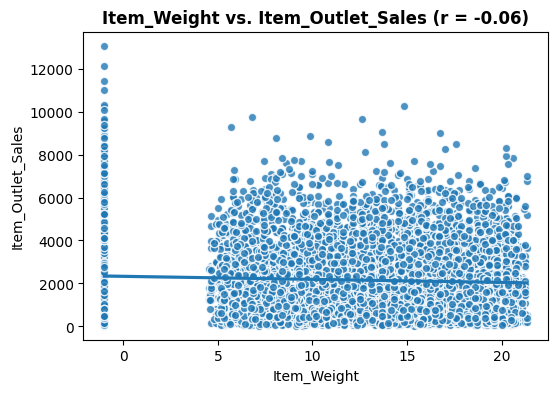

In [560]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

### No significant correlation with the target feature.

## Inspecting the "Item_Visibility" feature:

### The "Item_Visibility" feature dictionary is:
- The percentage of total display area of all products in a store allocated to the particular product


In [561]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

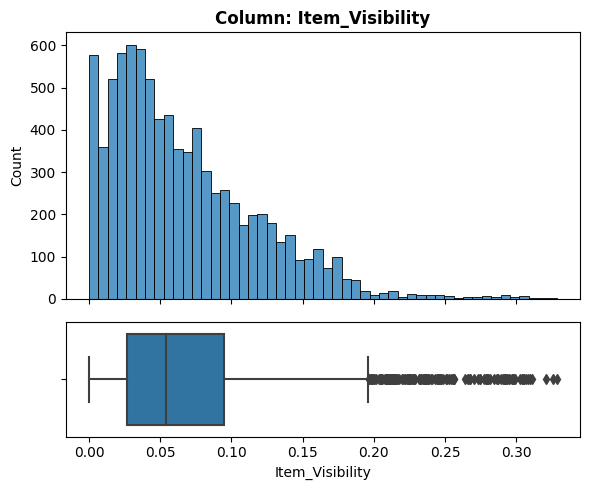

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [562]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_numeric(df, x, figsize=(6,5) );

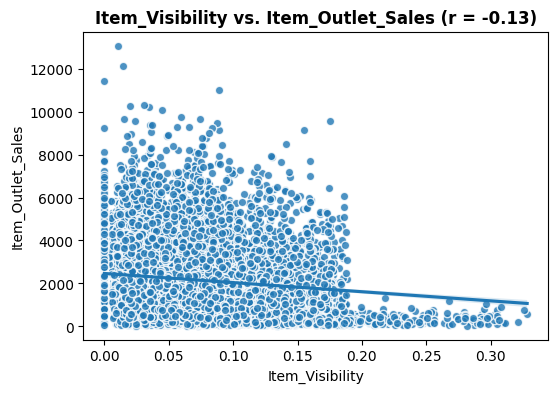

In [563]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

## Inspect the "Item_MRP" feature:

### The "Item_MRP" feature dictionary is:
- Maximum Retail Price (list price) of the product


In [564]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

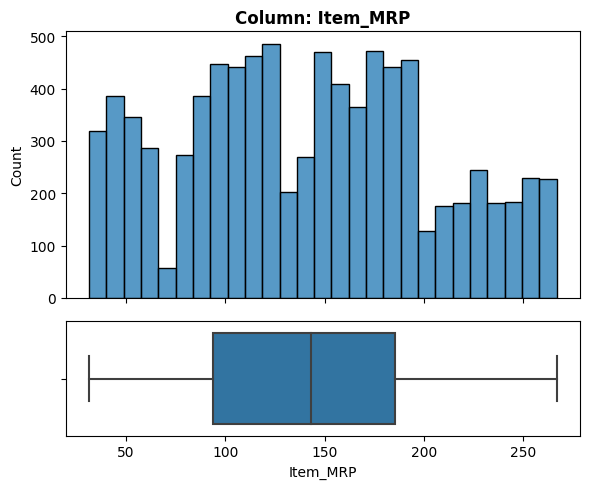

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [565]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_numeric(df, x, figsize=(6,5) );

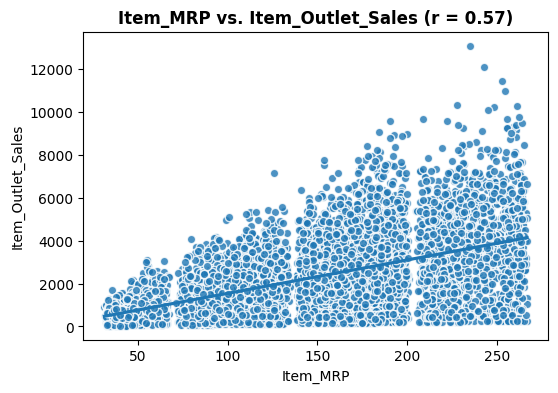

In [566]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

### It is not a constant feature, and it varies with the target, so it will be included.

## Inspect the "Outlet_Establishment_Year" feature:

### The "Outlet_Establishment_Year" feature dictionary is:
- The year in which store was established


In [567]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

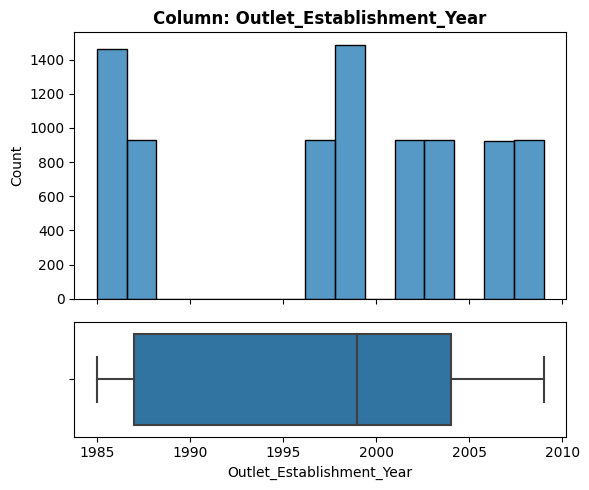

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [568]:
# run the appropriate explore function (based on feature's dtype)
x = feature
explore_numeric(df, x, figsize=(6,5) );

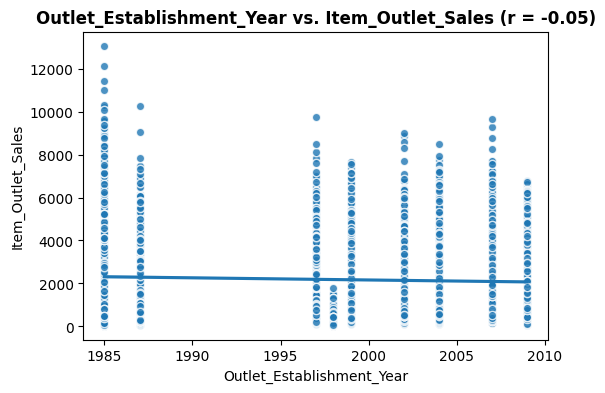

In [569]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4));

### It has no effect on the target, so it will be excluded.

Conclusions:
- catoegorial features to be included in the model are:
  - Outlet_Identifier
  - Outlet_Type
- numeric features to be included in the model are:
  - Item_Weight
  - Item_Visibility
  - Item_MRP


# **Project Part 5**

## **Import the packages**

In [570]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### **Load the original uncleaned data**

In [571]:
# Save the filepath and load the data as "df_titanic"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Drop duplicates and check for inconsistancy**

In [572]:
# check for duplicated rows
df.duplicated().sum()

0

In [573]:
# Drop the string column from the DataFrame.
df = df.drop('Item_Identifier', axis=1)

In [574]:
# check for inconsistancy
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [575]:
for col in string_cols:
  out = df[col].value_counts()
  print(out, end='\n\n')


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
G

In [576]:
# fix the inconsistancy in 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':"Regular", 'LF': 'Low Fat', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## **Format for ML and make data train test split**

In [577]:
# Define features and target
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## **Data Preprocessing**

In [578]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [579]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [580]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [581]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

## **Instantiate the column transfer**

In [582]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
 verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [583]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [588]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
